<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Principal Component Analysis with Pyleoclim

by [Julien Emile-Geay](https://orcid.org/0000-0001-5920-4751), [Deborah Khider](https://orcid.org/0000-0001-7501-8430)

## Preamble
Multivariate data reduction

### Goals

- PCA
- MC-PCA

**Reading Time: 15 min**

### Keywords
Principal Component Analysis, Singular Value Decomposition, Data Reduction

### Pre-requisites
None

### Relevant Packages
statsmodels, matplotlib, pylipd

## Data 
### Data Description

Euro2k ayayayayyyaya, PAGES 2k

### Loading
To load this dataset, we make use of [pylipd](https://pylipd.readthedocs.io). We first import everything into a pandas dataframe:

In [5]:
from pylipd.utils.dataset import load_dir
import numpy as np
lipd = load_dir(name='Euro2k')
df = lipd.get_timeseries_essentials()
# clean up strings now while waiting for bug fix in pylipd
df['paleoData_values']=df['paleoData_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))
df['time_values']=df['time_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))

Loading 31 LiPD files


100%|██████████| 31/31 [00:00<00:00, 53.78it/s]


Loaded..


/var/folders/bf/_x19bm694857h_hrw44j0p7w0000gn/T/ipykernel_65585/496163694.py:6: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['paleoData_values']=df['paleoData_values'].apply(lambda row : np.fromstring(row.strip("[]"), sep=','))


Next, we select all the variable names associated with temperature-dependent observations: 

In [6]:
dfs = df.query("paleoData_variableName in ('temperature','MXD','density','d18O','trsgi','density')") 

Next, we iterate over the rows of this dataframe, create GeoSeries objects for each proxy record, and bundle them all into a MultipleGeoSeries object:


In [7]:
import pyleoclim as pyleo
ts_list = []
for _, row in dfs.iterrows():
    ts_list.append(pyleo.GeoSeries(time=row['time_values'],value=row['paleoData_values'],
                                   time_name='Time',value_name=row['paleoData_variableName'],
                                   time_unit=row['time_units'], value_unit=row['paleoData_units'],
                                   lat = row['geo_meanLat'], lon = row['geo_meanLon'],
                                   archiveType = row['archiveType'], verbose = False, 
                                   label=row['dataSetName']+'_'+row['paleoData_variableName'])) 

Euro2k = pyleo.MultipleGeoSeries(ts_list, label='Euro2k')  

/Users/julieneg/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:236: UserWarning: archiveType should be one of the following: ice-other, ice/rock, coral, documents, glacierice, hybrid, lakesediment, marinesediment, sclerosponge, speleothem, wood, molluskshells, peat, midden, instrumental, model, 
  warnings.warn('archiveType should be one of the following: ' + mystring)


Let's map these records:

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

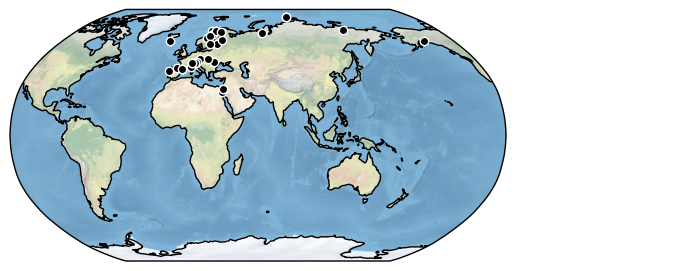

In [8]:
Euro2k.map()

In [ ]:
BUG: No legend. 